# PUI 2017 HW 3-1
## Yuwen Chang (ywc249)

In [1]:
# Import libraries
from __future__ import print_function

import numpy as np
import pandas as pd
import pylab as pl
%pylab inline

import seaborn
from scipy.optimize import curve_fit, minimize

# Set seed
np.random.seed(10)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Create a dictionary data structure
d = {}
distributions = ['Normal', 'Binomial', 'Poisson', 'Chi-Square', 'Laplace']

for dist in distributions:
    d[dist] = {}
    d[dist]['samples'] = {}
    d[dist]['means'] = {}

d

{'Binomial': {'means': {}, 'samples': {}},
 'Chi-Square': {'means': {}, 'samples': {}},
 'Laplace': {'means': {}, 'samples': {}},
 'Normal': {'means': {}, 'samples': {}},
 'Poisson': {'means': {}, 'samples': {}}}

In [3]:
# Set sample sizes and population mean
mysize = range(10, 2000, 20)
mean = 10
p = 0.5
n = mean / p

# Draw samples from each distribution
for i in mysize:
    d['Normal']['samples'][i] = np.random.normal(loc=mean, scale=2, size=i)
    d['Binomial']['samples'][i] = np.random.binomial(n=n, p=p, size=i)
    d['Poisson']['samples'][i] = np.random.poisson(lam=mean, size=i)
    d['Chi-Square']['samples'][i] = np.random.chisquare(df=mean, size=i)
    d['Laplace']['samples'][i] = np.random.laplace(loc=mean, scale=2, size=i)

# Sore sample means
for dist in distributions:
    for i in mysize:
        d[dist]['means'][i] = d[dist]['samples'][i].mean()

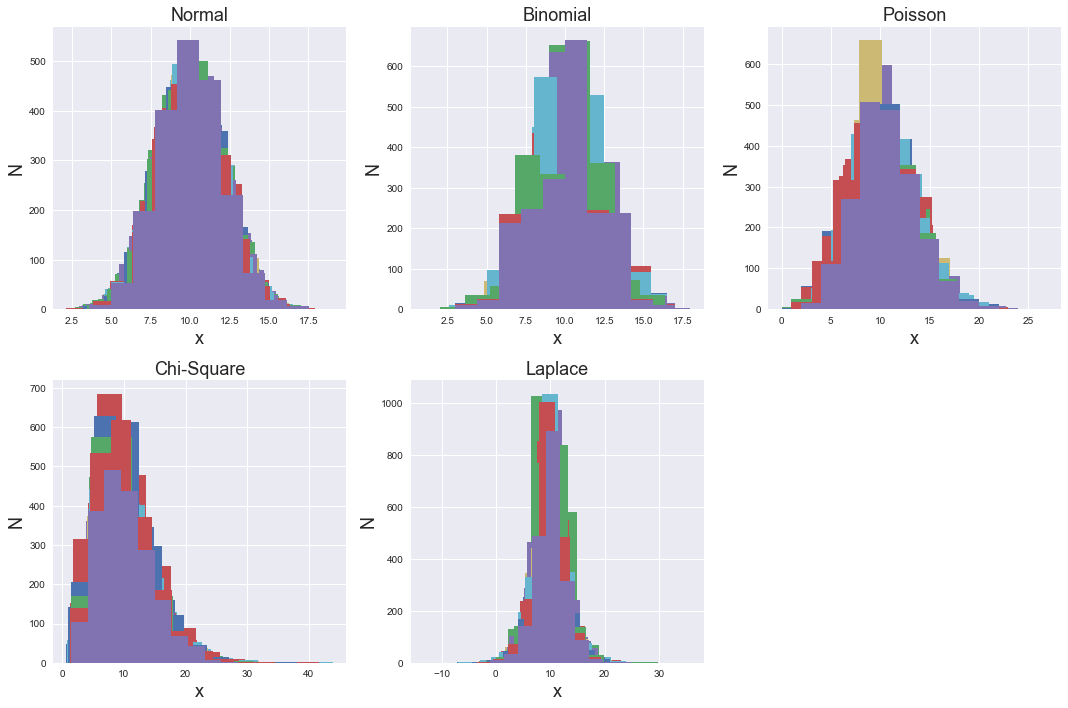

In [4]:
# Plot histograms for sample distributions
fig1 = pl.figure(figsize=(15,10))
i = 1

for dist in distributions:
    for n in d[dist]['samples']:
        ax_hist = fig1.add_subplot(2,3,i)
        ax_hist.hist(d[dist]['samples'][n])
    pl.title(dist, fontsize=18)
    pl.xlabel('x', fontsize=18)
    pl.ylabel('N', fontsize=18)
    #pl.plot([mean, mean], [0, 250], 'k')
    i += 1

pl.tight_layout()

### Figure 1: Sample distributions of different population distributions (mean = 10)

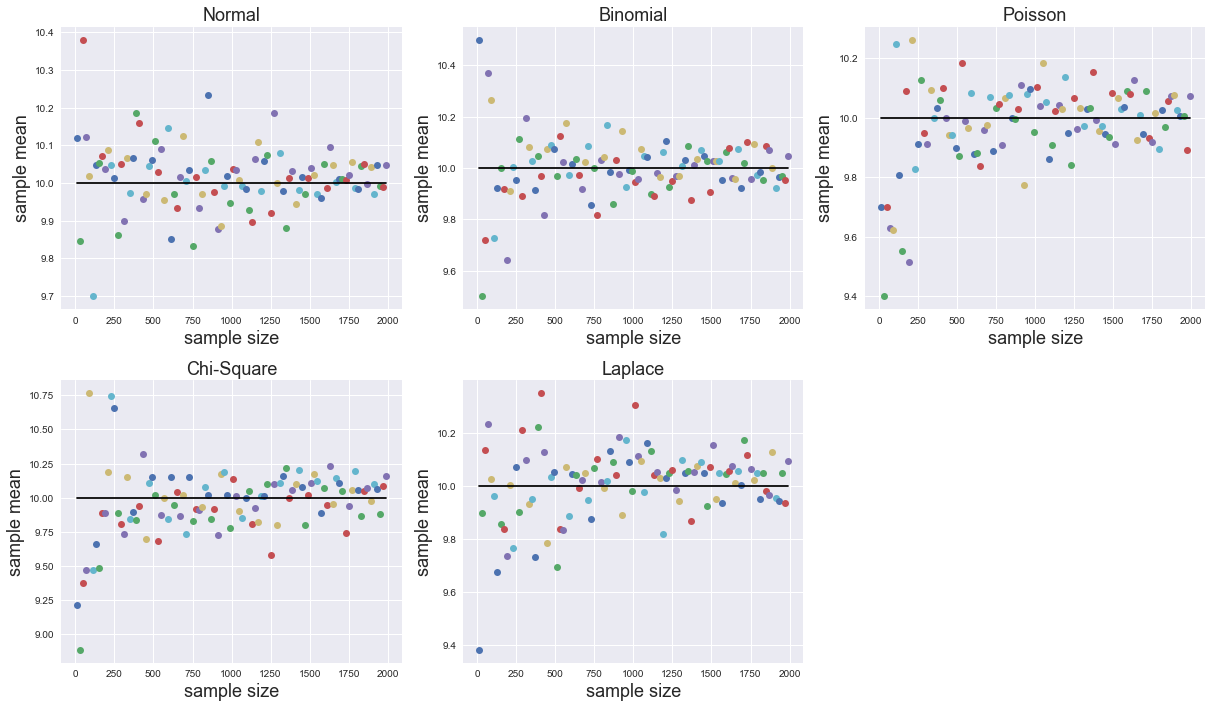

In [5]:
# Plot scatterplots
fig2 = pl.figure(figsize=(17,10))
i = 1

for dist in distributions:
    ax_mu_n = fig2.add_subplot(2,3,i)
    for n in d[dist]['samples']:
        ax_mu_n.plot(n, d[dist]['means'][n], 'o')
    ax_mu_n.set_xlabel('sample size', fontsize=18)
    ax_mu_n.set_ylabel('sample mean', fontsize=18)
    ax_mu_n.set_title(dist, fontsize=18)
    ax_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')
    i += 1

pl.tight_layout()
#fig2.suptitle('Fig 2: Relations between Sample Sizes and Sample Means', fontsize=18)

### Figure 2: Relations between sample sizes and sample means
#### Observation: As sample size grows, the sample mean tends to converge (stick closer) to the population mean.

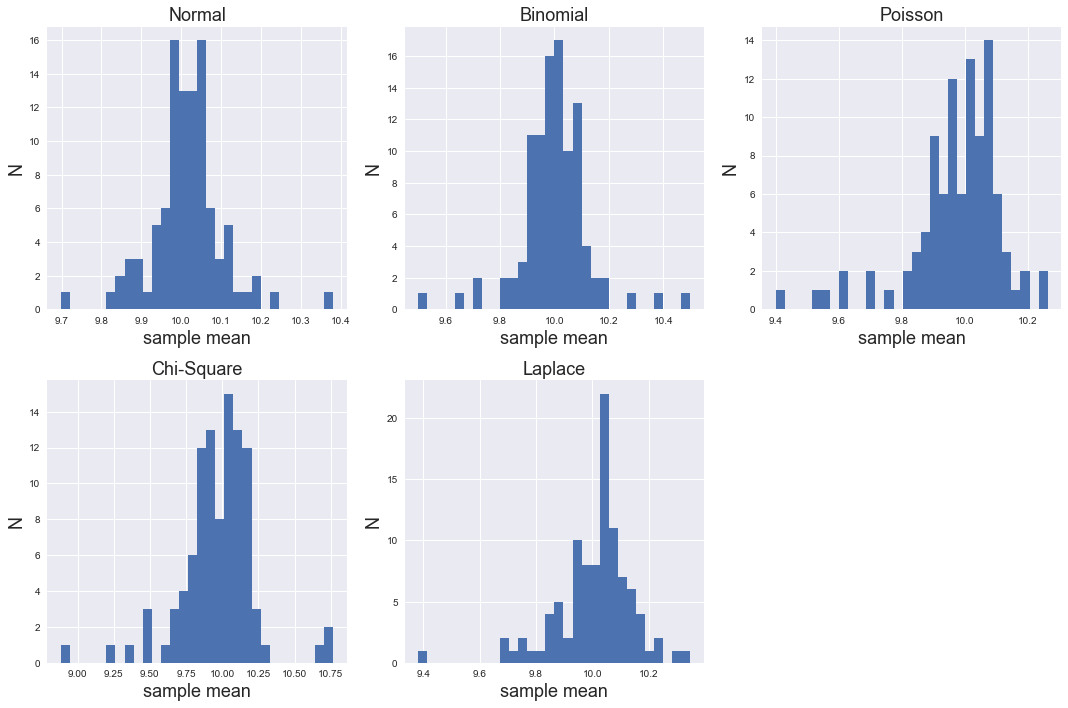

In [6]:
# Plot histograms of distributions of sample means
fig3 = pl.figure(figsize=(15,10))
i = 1

for dist in distributions:
    allmeans = list(d[dist]['means'].values())
    
    ax_hist = fig3.add_subplot(2,3,i)
    ax_hist.hist(allmeans, bins=30)
    
    pl.title(dist, fontsize=18)
    pl.xlabel('sample mean', fontsize = 18)
    pl.ylabel('N', fontsize = 18)

    i += 1

pl.tight_layout()

### Figure 3: Histograms of sample means of different distributions
#### Observation:
- The distribution of sample means also conforms similarly to a Gaussian distribution.
- Thus, most sample means are actually pretty close to the population mean (10).

### Extra Credit: FIT a gaussian to the distribution of means